# 02 — Exploratory Data Analysis (Fraud Patterns)

### Objectives:
- Understand fraud distribution & imbalance
- Identify high-risk transaction types and patterns
- Generate insights to support fraud prevention strategy



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

sns.set(style="whitegrid")

df = pd.read_csv("../data/processed/onlinefraud_clean.csv")
df.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orig_balance_change,dest_balance_change,net_balance_change,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,dest_party_type_merchant
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,-9839.64,0.0,-9839.64,False,False,True,False,True
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1864.28,0.0,-1864.28,False,False,True,False,True
2,1,181.00,181.0,0.00,0.0,0.0,1,0,-181.00,0.0,-181.00,False,False,False,True,False
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,-181.00,-21182.0,-21363.00,True,False,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,-11668.14,0.0,-11668.14,False,False,True,False,True


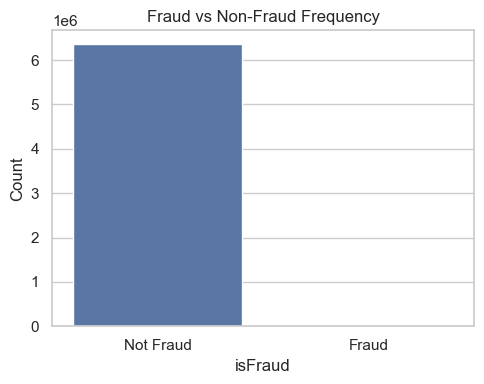

isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64

In [6]:
os.makedirs("../images", exist_ok=True)

fraud_counts = df['isFraud'].value_counts()

plt.figure(figsize=(5,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0,1], labels=["Not Fraud", "Fraud"])
plt.title("Fraud vs Non-Fraud Frequency")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("../images/fraud_imbalance.png", dpi=300)
plt.show()

(fraud_counts / fraud_counts.sum()) * 100

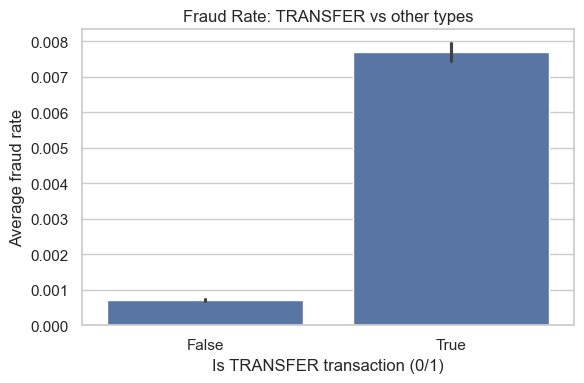

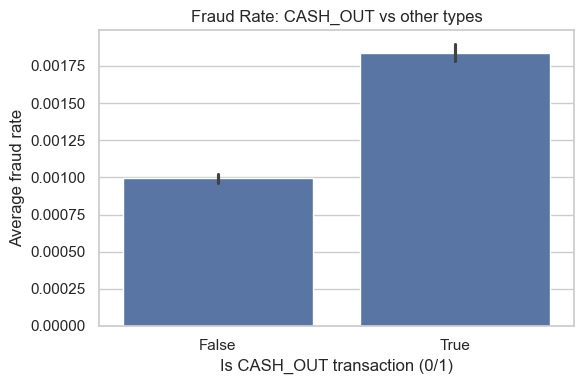

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x="type_TRANSFER",
    y="isFraud"
)
plt.title("Fraud Rate: TRANSFER vs other types")
plt.xlabel("Is TRANSFER transaction (0/1)")
plt.ylabel("Average fraud rate")

plt.tight_layout()
plt.savefig("../images/fraud_by_type_transfer.png", dpi=300)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x="type_CASH_OUT",
    y="isFraud"
)
plt.title("Fraud Rate: CASH_OUT vs other types")
plt.xlabel("Is CASH_OUT transaction (0/1)")
plt.ylabel("Average fraud rate")

plt.tight_layout()
plt.savefig("../images/fraud_by_type_cashout.png", dpi=300)
plt.show()


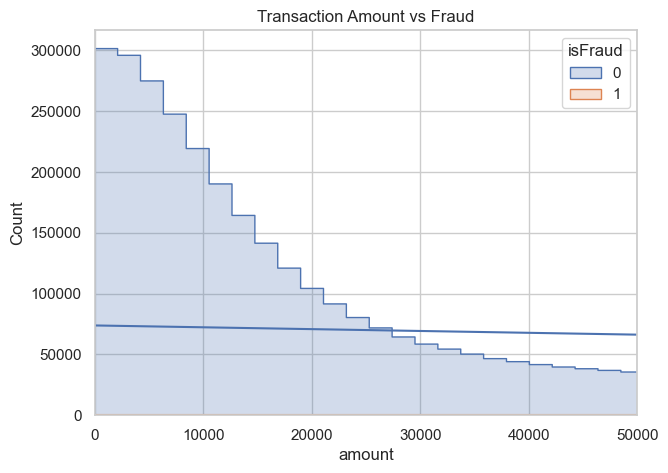

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(
    data=df, 
    x="amount", 
    hue="isFraud", 
    bins=50,
    element="step",
    stat="density",
    common_norm=False
)
plt.xlim(0, 50000)  # focus on bulk of transactions
plt.title("Transaction Amount Distribution by Fraud Label")
plt.xlabel("Amount")
plt.ylabel("Density")

plt.tight_layout()
plt.savefig("../images/amount_vs_fraud.png", dpi=300)
plt.show()


In [ ]:
fraud_role = df.groupby(['orig_party_type_merchant', 'isFraud']).size().unstack()

fraud_role.plot(kind='bar', figsize=(6,5))
plt.title("Fraud by Origin Party Type")
plt.xlabel("Merchant Origin?")
plt.show()


KeyError: 'orig_party_type_merchant'

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Engineered Features")
plt.show()


## 🧠 Key Insights

- Fraud is **extremely rare** → need special metrics beyond accuracy
- **TRANSFER & CASH_OUT** transactions show the highest fraud risk
- Fraudsters often act as **merchants** (fake destinations)
- Fraud amounts often fall in “mid-range” values → avoid detection rules
- Balance change features highlight abnormal fund movements

These insights will guide:
✔ Feature selection  
✔ Model focus on high-risk transaction types  
✔ Business fraud rules + advisor education
